In [ ]:
!pip install wordcloud

In [14]:
import nltk
from nltk.corpus import inaugural
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [45]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [22]:
len(inaugural.fileids())

59

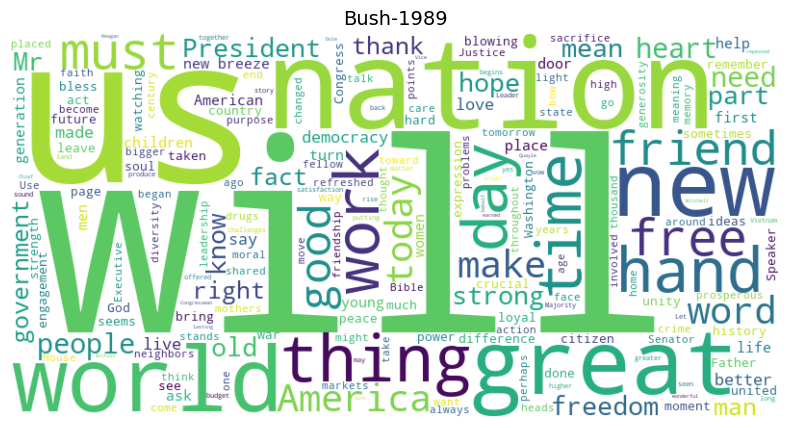

In [17]:
speech_text = inaugural.raw("1989-Bush.txt")

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(speech_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.title("Bush-1989", fontsize=14)
plt.show()


In [18]:
output_dir = "wordclouds"
os.makedirs(output_dir, exist_ok=True)

In [21]:
def generate_word_cloud(text, filename):
    """Generate a word cloud and save it as an image."""
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    file_path = os.path.join(output_dir, filename)
    wordcloud.to_file(file_path)
    print(f"Saved: {file_path}")

In [20]:
for file_id in inaugural.fileids():
    speech_text = inaugural.raw(file_id)
    filename = f"{file_id.replace('.txt', '')}_wordcloud.png"
    generate_word_cloud(speech_text, filename)

Saved: wordclouds\1789-Washington_wordcloud.png
Saved: wordclouds\1793-Washington_wordcloud.png
Saved: wordclouds\1797-Adams_wordcloud.png
Saved: wordclouds\1801-Jefferson_wordcloud.png
Saved: wordclouds\1805-Jefferson_wordcloud.png
Saved: wordclouds\1809-Madison_wordcloud.png
Saved: wordclouds\1813-Madison_wordcloud.png
Saved: wordclouds\1817-Monroe_wordcloud.png
Saved: wordclouds\1821-Monroe_wordcloud.png
Saved: wordclouds\1825-Adams_wordcloud.png
Saved: wordclouds\1829-Jackson_wordcloud.png
Saved: wordclouds\1833-Jackson_wordcloud.png
Saved: wordclouds\1837-VanBuren_wordcloud.png
Saved: wordclouds\1841-Harrison_wordcloud.png
Saved: wordclouds\1845-Polk_wordcloud.png
Saved: wordclouds\1849-Taylor_wordcloud.png
Saved: wordclouds\1853-Pierce_wordcloud.png
Saved: wordclouds\1857-Buchanan_wordcloud.png
Saved: wordclouds\1861-Lincoln_wordcloud.png
Saved: wordclouds\1865-Lincoln_wordcloud.png
Saved: wordclouds\1869-Grant_wordcloud.png
Saved: wordclouds\1873-Grant_wordcloud.png
Saved: wordc

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [26]:
token_sets = {}

for file_id in inaugural.fileids():
    tokens = word_tokenize(inaugural.raw(file_id))
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]

    token_sets[file_id] = filtered_tokens

In [29]:
from collections import Counter

frequency_sets = {}

for key, value in token_sets.items():
    frequency_sets[key] = Counter(value)

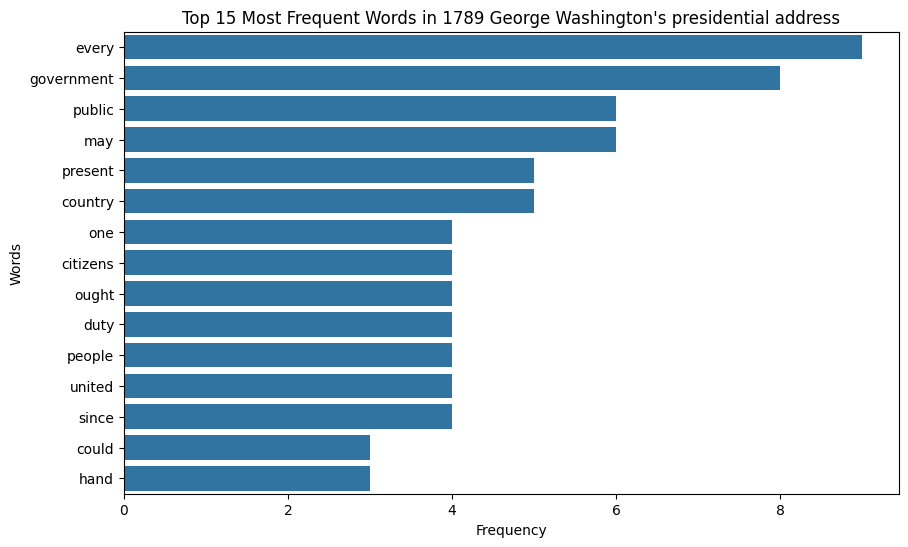

In [40]:
import seaborn as sns

word_counts = frequency_sets['1789-Washington.txt']

sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
words, counts = zip(*sorted_words)

top_n = 15
words, counts = words[:top_n], counts[:top_n]

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title("Top 15 Most Frequent Words in 1789 George Washington's presidential address")

plt.show()